# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': -37.6167, 'lon': -73.65},
 'dt': 1705954387,
 'id': 3883457,
 'main': {'feels_like': 18.31,
          'grnd_level': 1008,
          'humidity': 68,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 18.62,
          'temp_max': 18.62,
          'temp_min': 18.62},
 'name': 'Lebu',
 'sys': {'country': 'CL', 'sunrise': 1705917418, 'sunset': 1705968888},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 206, 'gust': 6.94, 'speed': 5.13}}
-37.6167
-73.65
18.62
68
1
5.13
'CL'
1705954387


In [17]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | fortuna
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | dili
Processing Record 5 of Set 1 | myeik
Processing Record 6 of Set 1 | cidreira
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | anadyr
Processing Record 10 of Set 1 | flying fish cove
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | utrik
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | kerikeri
Processing Record 16 of Set 1 | vilhena
Processing Record 17 of Set 1 | buala
Processing Record 18 of Set 1 | severo-yeniseyskiy
Processing Record 19 of Set 1 | ariquemes
Processing Record 20 of Set 1 | mersa matruh
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | vilyuysk
Processing Re

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,18.62,68,1,5.13,CL,1705954643
1,fortuna,40.5982,-124.1573,17.18,87,75,0.89,US,1705954644
2,dili,-8.5586,125.5736,27.54,79,100,2.19,TL,1705954644
3,myeik,12.4333,98.6000,21.06,68,29,2.09,MM,1705954645
4,cidreira,-30.1811,-50.2056,22.68,66,98,6.76,BR,1705954645


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,18.62,68,1,5.13,CL,1705954643
1,fortuna,40.5982,-124.1573,17.18,87,75,0.89,US,1705954644
2,dili,-8.5586,125.5736,27.54,79,100,2.19,TL,1705954644
3,myeik,12.4333,98.6000,21.06,68,29,2.09,MM,1705954645
4,cidreira,-30.1811,-50.2056,22.68,66,98,6.76,BR,1705954645


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

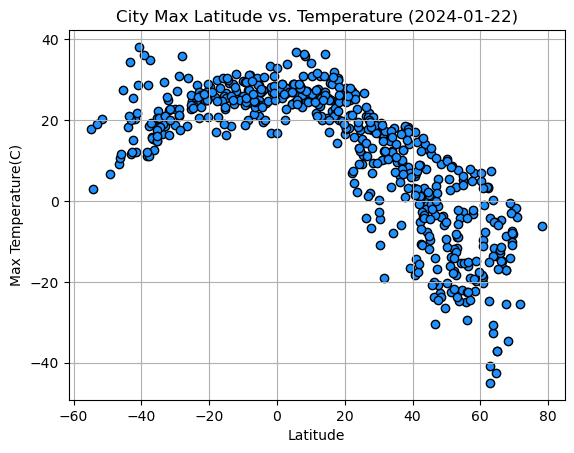

In [33]:
# Build scatter plot for latitude vs. temperature
lat_ax = city_data_df["Lat"]
temp_ax = city_data_df["Max Temp"]

plt.scatter(lat_ax,temp_ax, facecolors='#1E90FF', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title("City Max Latitude vs. Temperature (2024-01-22)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

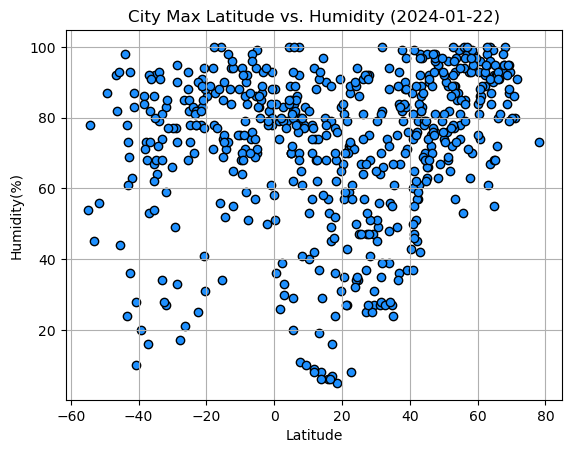

In [34]:
# Build the scatter plots for latitude vs. humidity
hum_ax = city_data_df["Humidity"]

plt.scatter(lat_ax, hum_ax, facecolors='#1E90FF', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Max Latitude vs. Humidity (2024-01-22)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

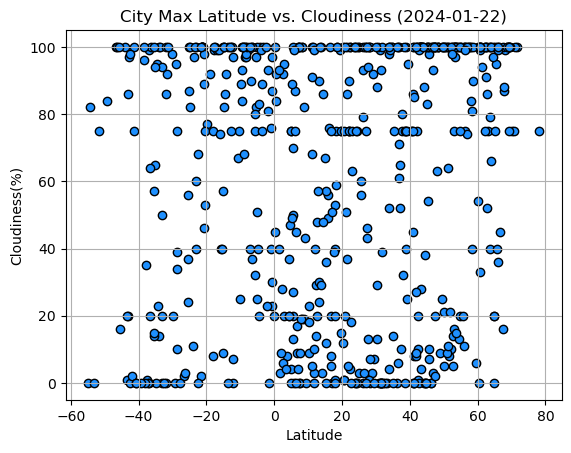

In [35]:
# Build the scatter plots for latitude vs. cloudiness
cloud_ax = city_data_df["Cloudiness"]

plt.scatter(lat_ax, cloud_ax, facecolors='#1E90FF', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Max Latitude vs. Cloudiness (2024-01-22)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

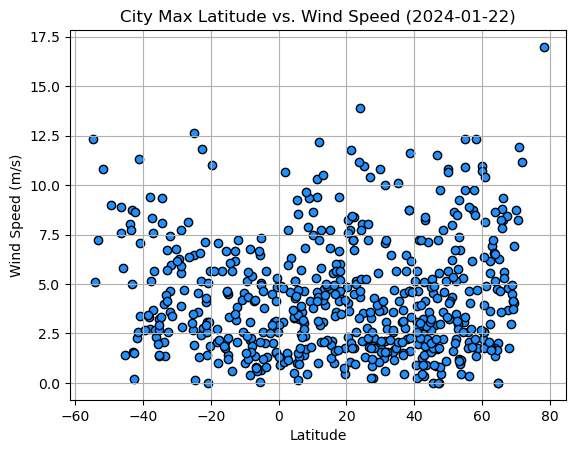

In [36]:
# Build the scatter plots for latitude vs. wind speed
wind_ax = city_data_df["Wind Speed"]

plt.scatter(lat_ax, wind_ax, facecolors='#1E90FF', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Max Latitude vs. Wind Speed (2024-01-22)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [85]:
# Define a function to create Linear Regression plots
def regress_plot(x, y, string, a_x, a_y):
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    print(f"The square of r-value is: {rvalue**2}")
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.xlabel("Latitude")
    plt.ylabel(string)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(a_x,a_y),fontsize=15,color="red")
    plt.show()


In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,fortuna,40.5982,-124.1573,17.18,87,75,0.89,US,1705954644
3,myeik,12.4333,98.6000,21.06,68,29,2.09,MM,1705954645
6,longyearbyen,78.2186,15.6401,-6.09,73,75,16.98,SJ,1705954645
7,anadyr,64.7500,177.4833,-13.72,92,20,2.00,RU,1705954646
9,nemuro,43.3236,145.5750,0.05,86,100,8.24,JP,1705954587


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,18.62,68,1,5.13,CL,1705954643
2,dili,-8.5586,125.5736,27.54,79,100,2.19,TL,1705954644
4,cidreira,-30.1811,-50.2056,22.68,66,98,6.76,BR,1705954645
5,ushuaia,-54.8000,-68.3000,17.79,54,0,12.35,AR,1705954645
8,flying fish cove,-10.4217,105.6791,25.82,88,75,2.57,CX,1705954646


###  Temperature vs. Latitude Linear Regression Plot

The square of r-value is: 0.7056715065874597


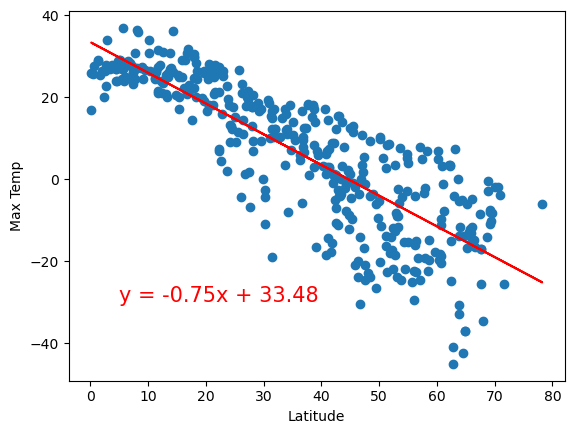

In [86]:
# Linear regression on Northern Hemisphere
n_lat = northern_hemi_df["Lat"]
n_temp = northern_hemi_df["Max Temp"]

regress_plot(n_lat, n_temp, "Max Temp", 5, -30)

The square of r-value is: 0.26921565086432075


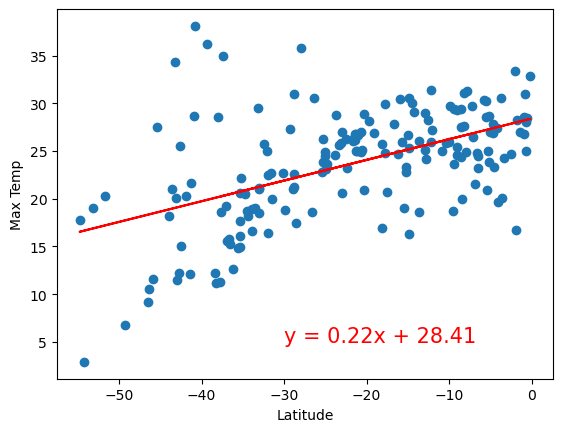

In [87]:
# Linear regression on Southern Hemisphere
s_lat = southern_hemi_df["Lat"]
s_temp = southern_hemi_df["Max Temp"]

regress_plot(s_lat, s_temp, "Max Temp", -30, 5)

**Discussion about the linear relationship:** 
The relationship between latitude and Max Temperature is very strong
In northern hemisphere, the max temperature drops when the latitude increases. 
It suggests that the weather is getting colder when further away from equator towards north.

In southern hemisphere, the max temperature drop the latitude decreases. 
It suggests that the weather is getting colder when further away from equator towards south.

### Humidity vs. Latitude Linear Regression Plot

The square of r-value is: 0.16087055587663007


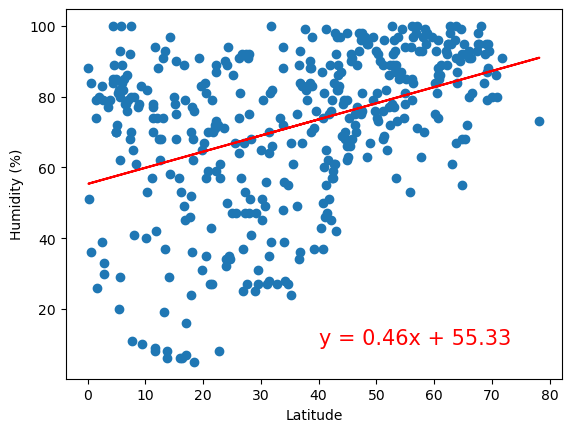

In [99]:
# Northern Hemisphere
regress_plot(n_lat, northern_hemi_df["Humidity"], "Humidity (%)", 40, 10)

The square of r-value is: 0.07010589243788905


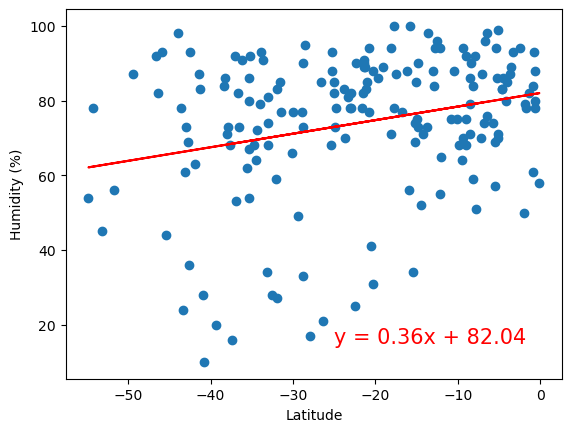

In [98]:
# Southern Hemisphere
regress_plot(s_lat, southern_hemi_df["Humidity"], "Humidity (%)", -25, 15)

**Discussion about the linear relationship:** 
The relationship between Humidity and Latitude is very weak.

With increase of Latitude, we can see a slightly increase in Humidity. 
However, we can see hight humidity level in low latitude cities as well. 
In northern hemisphere, the humidity increases when further away from equator.
In souther hemisphere, the humidity increases when closer to the squators

### Cloudiness vs. Latitude Linear Regression Plot

The square of r-value is: 0.08361577790508767


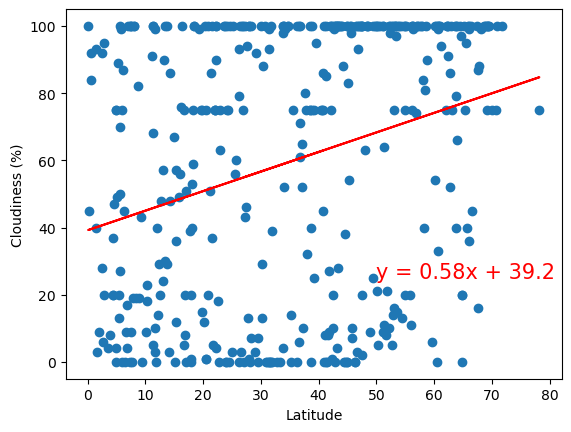

In [100]:
# Northern Hemisphere
regress_plot(n_lat, northern_hemi_df["Cloudiness"], "Cloudiness (%)", 50, 25)

The square of r-value is: 0.05833587316303065


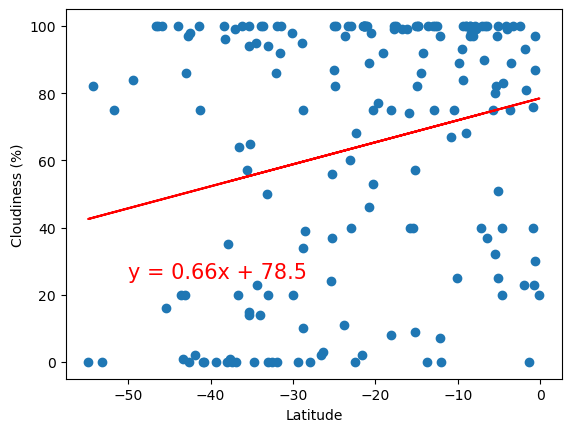

In [101]:
# Southern Hemisphere
regress_plot(s_lat, southern_hemi_df["Cloudiness"], "Cloudiness (%)", -50, 25)

**Discussion about the linear relationship:** 
The relationship between cloudiness and latitude is also very weak.
We can see high or low cloudiness cities in both high and low latitude regions.
However, the graphs show that the cloudiness slightly increases with the increase of latitude.
In northern hemisphere, the cloudiness increases when further away from equator.
In souther hemisphere, the cloudiness increases when closer to the squators

### Wind Speed vs. Latitude Linear Regression Plot

The square of r-value is: 0.009127072605352995


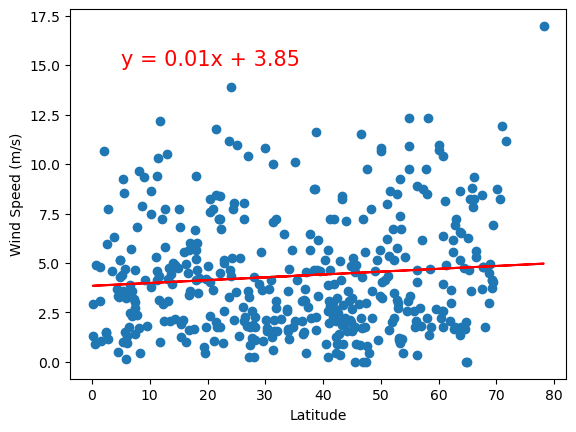

In [102]:
# Northern Hemisphere
regress_plot(n_lat, northern_hemi_df["Wind Speed"], "Wind Speed (m/s)", 5, 15)

The square of r-value is: 0.12663977128980114


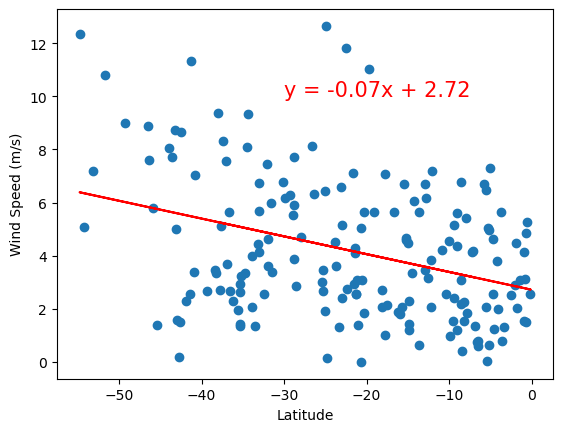

In [103]:
# Southern Hemisphere
regress_plot(s_lat, southern_hemi_df["Wind Speed"], "Wind Speed (m/s)", -30, 10)

**Discussion about the linear relationship:** 
Based on the graphs, the relationship between wind speed and latitude is very weak.
In northern hemishphere, the wind speed increases with the latitude.
However, in southern hemisphere, the wind speed decreases with the latitude.
It suggests that the further away from the equator, the higher the wind speed.